## Mapping supplemental data from deck 704 to a CDM

This guide is a follow up from the [mdf_reader()](https://git.noc.ac.uk/brecinosrivas/mdf_reader/-/tree/master/) python tool [notebooks](https://git.noc.ac.uk/brecinosrivas/mdf_reader/-/tree/master/docs/notebooks). Where we extracted supplemental metadata from [ICOADSv3.0](https://icoads.noaa.gov/r3.html) stored in the [IMMA](https://icoads.noaa.gov/e-doc/imma/R3.0-imma1.pdf) format. 
Now we will map this supplemental data to a Common Data Model (CDM) format defined in the following [documentation](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/blob/master/docs/cdm_latest.pdf).

This is done by using the [cdm-mapper](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/tree/master) python tool and following the workflow explained below. 

Along this notebook we will also point out to Issues found in the cdm-mapper reader that need to be address depending if we want to map all original variables to the cdm.

We read supplemental metadata for an example deck: `704`, the [US Marine Meteorological Journals Collection](https://icoads.noaa.gov/usmmj.html)

In [1]:
import os
import sys
MAIN_PATH = '/Users/brivas/c3s_work'
sys.path.append(MAIN_PATH)
import cdm
import json
import pandas as pd
import mdf_reader

/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
2021-01-22 14:48:55,388 - numba.core.byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=139)
           2	LOAD_CONST(arg=1, lineno=139)
           4	STORE_FAST(arg=3, lineno=139)
           6	LOAD_GLOBAL(arg=0, lineno=141)
           8	LOAD_ATTR(arg=1, lineno=141)
          10	LOAD_FAST(arg=1, lineno=141)
          12	LOAD_FAST(arg=2, lineno=141)
          14	BUILD_LIST(arg=2, lineno=141)
          16	LOAD_GLOBAL(arg=0, lineno=141)
          18	LOAD_ATTR(arg=2, lineno=141)
          20	LOAD_CONST(arg=2, lineno=141)
          22	CALL_FUNCTION_KW(arg=2, lineno=141)
          24	STORE_FAST(arg=1, lineno=141)
          26	LOAD_CONST(arg=3, lineno=143)
          28	LOAD_FAST(arg=0, lin

2021-01-22 14:48:55,391 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:55,392 - numba.core.byteflow - DEBUG - dispatch pc=4, inst=STORE_FAST(arg=3, lineno=139)
2021-01-22 14:48:55,393 - numba.core.byteflow - DEBUG - stack ['$const2.0']
2021-01-22 14:48:55,393 - numba.core.byteflow - DEBUG - dispatch pc=6, inst=LOAD_GLOBAL(arg=0, lineno=141)
2021-01-22 14:48:55,394 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:55,394 - numba.core.byteflow - DEBUG - dispatch pc=8, inst=LOAD_ATTR(arg=1, lineno=141)
2021-01-22 14:48:55,395 - numba.core.byteflow - DEBUG - stack ['$6load_global.1']
2021-01-22 14:48:55,395 - numba.core.byteflow - DEBUG - dispatch pc=10, inst=LOAD_FAST(arg=1, lineno=141)
2021-01-22 14:48:55,396 - numba.core.byteflow - DEBUG - stack ['$8load_attr.2']
2021-01-22 14:48:55,396 - numba.core.byteflow - DEBUG - dispatch pc=12, inst=LOAD_FAST(arg=2, lineno=141)
2021-01-22 14:48:55,397 - numba.core.byteflow - DEBUG - stack ['$8load_attr.2', '$x10.3']
2021-01-22 1

2021-01-22 14:48:55,444 - numba.core.byteflow - DEBUG - dispatch pc=66, inst=CALL_FUNCTION(arg=1, lineno=149)
2021-01-22 14:48:55,445 - numba.core.byteflow - DEBUG - stack ['$62load_global.0', '$n64.1']
2021-01-22 14:48:55,445 - numba.core.byteflow - DEBUG - dispatch pc=68, inst=GET_ITER(arg=None, lineno=149)
2021-01-22 14:48:55,446 - numba.core.byteflow - DEBUG - stack ['$66call_function.2']
2021-01-22 14:48:55,447 - numba.core.byteflow - DEBUG - end state. edges=[Edge(pc=70, stack=('$68get_iter.3',), blockstack=({'kind': BlockKind(LOOP), 'end': 172, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}, {'kind': BlockKind(LOOP), 'end': 160, 'entry_stack': 0, 'stack_depth': 0, 'handler': None}), npush=0)]
2021-01-22 14:48:55,447 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=172 nstack_initial=0), State(pc_initial=70 nstack_initial=1)])
2021-01-22 14:48:55,448 - numba.core.byteflow - DEBUG - stack: []
2021-01-22 14:48:55,448 - numba.core.byteflow - DEBUG - dispatch pc

2021-01-22 14:48:55,485 - numba.core.byteflow - DEBUG - stack ['$phi186.0', '$phi186.1']
2021-01-22 14:48:55,485 - numba.core.byteflow - DEBUG - dispatch pc=188, inst=LOAD_FAST(arg=1, lineno=160)
2021-01-22 14:48:55,486 - numba.core.byteflow - DEBUG - stack ['$phi186.0']
2021-01-22 14:48:55,486 - numba.core.byteflow - DEBUG - dispatch pc=190, inst=LOAD_FAST(arg=7, lineno=160)
2021-01-22 14:48:55,487 - numba.core.byteflow - DEBUG - stack ['$phi186.0', '$x188.2']
2021-01-22 14:48:55,488 - numba.core.byteflow - DEBUG - dispatch pc=192, inst=DUP_TOP_TWO(arg=None, lineno=160)
2021-01-22 14:48:55,488 - numba.core.byteflow - DEBUG - stack ['$phi186.0', '$x188.2', '$i190.3']
2021-01-22 14:48:55,490 - numba.core.byteflow - DEBUG - dispatch pc=194, inst=BINARY_SUBSCR(arg=None, lineno=160)
2021-01-22 14:48:55,490 - numba.core.byteflow - DEBUG - stack ['$phi186.0', '$x188.2', '$i190.3', '$192dup_top_two.4', '$192dup_top_two.5']
2021-01-22 14:48:55,491 - numba.core.byteflow - DEBUG - dispatch pc=19

2021-01-22 14:48:55,525 - numba.core.byteflow - DEBUG - stack ['$phi104.0', '$x104.1', '$const106.2']
2021-01-22 14:48:55,526 - numba.core.byteflow - DEBUG - dispatch pc=110, inst=LOAD_FAST(arg=1, lineno=153)
2021-01-22 14:48:55,526 - numba.core.byteflow - DEBUG - stack ['$phi104.0', '$108binary_subscr.3']
2021-01-22 14:48:55,527 - numba.core.byteflow - DEBUG - dispatch pc=112, inst=LOAD_FAST(arg=7, lineno=153)
2021-01-22 14:48:55,527 - numba.core.byteflow - DEBUG - stack ['$phi104.0', '$108binary_subscr.3', '$x110.4']
2021-01-22 14:48:55,528 - numba.core.byteflow - DEBUG - dispatch pc=114, inst=BINARY_SUBSCR(arg=None, lineno=153)
2021-01-22 14:48:55,528 - numba.core.byteflow - DEBUG - stack ['$phi104.0', '$108binary_subscr.3', '$x110.4', '$i112.5']
2021-01-22 14:48:55,529 - numba.core.byteflow - DEBUG - dispatch pc=116, inst=BINARY_XOR(arg=None, lineno=153)
2021-01-22 14:48:55,529 - numba.core.byteflow - DEBUG - stack ['$phi104.0', '$108binary_subscr.3', '$114binary_subscr.6']
2021-01

2021-01-22 14:48:55,567 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=226 nstack_initial=0)])
2021-01-22 14:48:55,567 - numba.core.byteflow - DEBUG - stack: []
2021-01-22 14:48:55,567 - numba.core.byteflow - DEBUG - dispatch pc=226, inst=LOAD_FAST(arg=5, lineno=163)
2021-01-22 14:48:55,568 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:55,568 - numba.core.byteflow - DEBUG - dispatch pc=228, inst=LOAD_CONST(arg=3, lineno=163)
2021-01-22 14:48:55,569 - numba.core.byteflow - DEBUG - stack ['$Q226.0']
2021-01-22 14:48:55,569 - numba.core.byteflow - DEBUG - dispatch pc=230, inst=COMPARE_OP(arg=4, lineno=163)
2021-01-22 14:48:55,570 - numba.core.byteflow - DEBUG - stack ['$Q226.0', '$const228.1']
2021-01-22 14:48:55,571 - numba.core.byteflow - DEBUG - dispatch pc=232, inst=POP_JUMP_IF_FALSE(arg=276, lineno=163)
2021-01-22 14:48:55,571 - numba.core.byteflow - DEBUG - stack ['$230compare_op.2']
2021-01-22 14:48:55,572 - numba.core.byteflow - DEBUG - end state. edg

2021-01-22 14:48:55,607 - numba.core.byteflow - DEBUG - end state. edges=[Edge(pc=288, stack=('$286get_iter.3',), blockstack=({'kind': BlockKind(LOOP), 'end': 314, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]
2021-01-22 14:48:55,608 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=266 nstack_initial=0), State(pc_initial=226 nstack_initial=0), State(pc_initial=288 nstack_initial=1)])
2021-01-22 14:48:55,608 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=226 nstack_initial=0), State(pc_initial=288 nstack_initial=1)])
2021-01-22 14:48:55,609 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=288 nstack_initial=1)])
2021-01-22 14:48:55,609 - numba.core.byteflow - DEBUG - stack: ['$phi288.0']
2021-01-22 14:48:55,610 - numba.core.byteflow - DEBUG - dispatch pc=288, inst=FOR_ITER(arg=22, lineno=167)
2021-01-22 14:48:55,610 - numba.core.byteflow - DEBUG - stack ['$phi288.0']
2021-01-22 14:48:55,610 - numba.core.byteflow - DEB

2021-01-22 14:48:55,644 - numba.core.byteflow - DEBUG - defmap: {'$phi184.0': State(pc_initial=172 nstack_initial=0),
 '$phi186.1': State(pc_initial=184 nstack_initial=1),
 '$phi288.0': State(pc_initial=278 nstack_initial=0),
 '$phi290.1': State(pc_initial=288 nstack_initial=1),
 '$phi70.0': State(pc_initial=60 nstack_initial=0),
 '$phi72.1': State(pc_initial=70 nstack_initial=1)}
2021-01-22 14:48:55,645 - numba.core.byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi104.0': {('$phi72.0', State(pc_initial=72 nstack_initial=2))},
             '$phi184.0': {('$182get_iter.4',
                            State(pc_initial=172 nstack_initial=0)),
                           ('$phi186.0',
                            State(pc_initial=186 nstack_initial=2))},
             '$phi186.0': {('$phi184.0',
                            State(pc_initial=184 nstack_initial=1))},
             '$phi186.1': {('$184for_iter.2',
                            State(pc_initial=184 nstack_init

2021-01-22 14:48:55,652 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=42 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={44: ()})
2021-01-22 14:48:55,653 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=44 nstack_initial=0):
AdaptBlockInfo(insts=((44, {'res': '$Q44.0'}), (46, {'res': '$const46.1'}), (48, {'lhs': '$Q44.0', 'rhs': '$const46.1', 'res': '$48compare_op.2'}), (50, {'pred': '$48compare_op.2'})), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 172, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={52: (), 170: ()})
2021-01-22 14:48:55,654 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=52 nstack_initial=0):
AdaptBlockInfo(insts=((52, {'res': '$Q52.0'}), (54, {'res': '$const54.1'}), (56, {'lhs': '$Q52.0', 'rhs': '$const54.1', 'res': '$56binary_subtract.2'}), (58, {'value': '$56binary_subtract.2'})), out

2021-01-22 14:48:55,661 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=214 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=({'kind': BlockKind(LOOP), 'end': 216, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), active_try_block=None, outgoing_edgepushed={216: ()})
2021-01-22 14:48:55,661 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=216 nstack_initial=0):
AdaptBlockInfo(insts=((216, {'res': '$const216.0'}), (218, {'value': '$const216.0'}), (220, {'res': '$M220.1'}), (222, {'value': '$M220.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={224: ()})
2021-01-22 14:48:55,662 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=224 nstack_initial=0):
AdaptBlockInfo(insts=(), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={226: ()})
2021-01-22 14:48:55,663 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=226 nstack_initial=0):
AdaptBlockInfo(insts=((

2021-01-22 14:48:55,701 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 0
2021-01-22 14:48:55,701 - numba.core.ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x141f991d0>
2021-01-22 14:48:55,702 - numba.core.ssa - DEBUG - on stmt: p = arg(0, name=p)
2021-01-22 14:48:55,703 - numba.core.ssa - DEBUG - on stmt: x = arg(1, name=x)
2021-01-22 14:48:55,704 - numba.core.ssa - DEBUG - on stmt: y = arg(2, name=y)
2021-01-22 14:48:55,704 - numba.core.ssa - DEBUG - on stmt: $const2.0 = const(int, 2)
2021-01-22 14:48:55,705 - numba.core.ssa - DEBUG - on stmt: n = $const2.0
2021-01-22 14:48:55,706 - numba.core.ssa - DEBUG - on stmt: $6load_global.1 = global(np: <module 'numpy' from '/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/numpy/__init__.py'>)
2021-01-22 14:48:55,706 - numba.core.ssa - DEBUG - on stmt: $8load_attr.2 = getattr(value=$6load_global.1, attr=array)
2021-01-22 14:48:55,707 - numba.core.ssa - DEBUG - on stmt: $14build_list

2021-01-22 14:48:55,812 - numba.core.ssa - DEBUG - on stmt: $134inplace_xor.16 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=$130binary_subscr.14, rhs=t, static_lhs=Undefined, static_rhs=Undefined)
2021-01-22 14:48:55,813 - numba.core.ssa - DEBUG - on stmt: x.1[0] = $134inplace_xor.16
2021-01-22 14:48:55,813 - numba.core.ssa - DEBUG - on stmt: $146binary_subscr.21 = getitem(value=x.1, index=i, fn=<built-in function getitem>)
2021-01-22 14:48:55,814 - numba.core.ssa - DEBUG - on stmt: $150inplace_xor.23 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=$146binary_subscr.21, rhs=t, static_lhs=Undefined, static_rhs=Undefined)
2021-01-22 14:48:55,814 - numba.core.ssa - DEBUG - on stmt: x.1[i] = $150inplace_xor.23
2021-01-22 14:48:55,815 - numba.core.ssa - DEBUG - on stmt: jump 315
2021-01-22 14:48:55,816 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 158
2021-01-22 14:48:55,816 - numba.core.ssa - DEBU

2021-01-22 14:48:55,854 - numba.core.ssa - DEBUG - on stmt: t.1 = $262inplace_xor.4
2021-01-22 14:48:55,854 - numba.core.ssa - DEBUG - on stmt: jump 266
2021-01-22 14:48:55,855 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 266
2021-01-22 14:48:55,855 - numba.core.ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x141f991d0>
2021-01-22 14:48:55,856 - numba.core.ssa - DEBUG - on stmt: $const268.1 = const(int, 1)
2021-01-22 14:48:55,857 - numba.core.ssa - DEBUG - on stmt: $270inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=Q.1, rhs=$const268.1, static_lhs=Undefined, static_rhs=Undefined)
2021-01-22 14:48:55,857 - numba.core.ssa - DEBUG - on stmt: Q.1 = $270inplace_rshift.2
2021-01-22 14:48:55,858 - numba.core.ssa - DEBUG - on stmt: jump 226
2021-01-22 14:48:55,859 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 276
2021-01-22 14:48:55,859 - numba.core.ssa - DEBUG - Running <numba.core.s

2021-01-22 14:48:55,883 - numba.core.ssa - DEBUG - SSA violators {'Q.1', 'i', 'Q', 't.1'}
2021-01-22 14:48:55,883 - numba.core.ssa - DEBUG - Fix SSA violator on var Q.1
2021-01-22 14:48:55,884 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 0
2021-01-22 14:48:55,884 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x141f991d0>
2021-01-22 14:48:55,885 - numba.core.ssa - DEBUG - on stmt: p = arg(0, name=p)
2021-01-22 14:48:55,885 - numba.core.ssa - DEBUG - on stmt: x = arg(1, name=x)
2021-01-22 14:48:55,886 - numba.core.ssa - DEBUG - on stmt: y = arg(2, name=y)
2021-01-22 14:48:55,886 - numba.core.ssa - DEBUG - on stmt: $const2.0 = const(int, 2)
2021-01-22 14:48:55,887 - numba.core.ssa - DEBUG - on stmt: n = $const2.0
2021-01-22 14:48:55,887 - numba.core.ssa - DEBUG - on stmt: $6load_global.1 = global(np: <module 'numpy' from '/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/numpy/__init__.py'>)
2021-01-22 14:48:55,888 - 

2021-01-22 14:48:55,924 - numba.core.ssa - DEBUG - on stmt: $130binary_subscr.14 = static_getitem(value=x.1, index=0, index_var=$const126.11, fn=<built-in function getitem>)
2021-01-22 14:48:55,924 - numba.core.ssa - DEBUG - on stmt: $134inplace_xor.16 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=$130binary_subscr.14, rhs=t, static_lhs=Undefined, static_rhs=Undefined)
2021-01-22 14:48:56,003 - numba.core.ssa - DEBUG - on stmt: x.1[0] = $134inplace_xor.16
2021-01-22 14:48:56,004 - numba.core.ssa - DEBUG - on stmt: $146binary_subscr.21 = getitem(value=x.1, index=i, fn=<built-in function getitem>)
2021-01-22 14:48:56,005 - numba.core.ssa - DEBUG - on stmt: $150inplace_xor.23 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=$146binary_subscr.21, rhs=t, static_lhs=Undefined, static_rhs=Undefined)
2021-01-22 14:48:56,006 - numba.core.ssa - DEBUG - on stmt: x.1[i] = $150inplace_xor.23
2021-01-22 14:48:56,007 - num

2021-01-22 14:48:56,051 - numba.core.ssa - DEBUG - on stmt: $const258.2 = const(int, 1)
2021-01-22 14:48:56,051 - numba.core.ssa - DEBUG - on stmt: $260binary_subtract.3 = Q.1 - $const258.2
2021-01-22 14:48:56,052 - numba.core.ssa - DEBUG - on stmt: $262inplace_xor.4 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=t.1, rhs=$260binary_subtract.3, static_lhs=Undefined, static_rhs=Undefined)
2021-01-22 14:48:56,052 - numba.core.ssa - DEBUG - on stmt: t.1 = $262inplace_xor.4
2021-01-22 14:48:56,053 - numba.core.ssa - DEBUG - on stmt: jump 266
2021-01-22 14:48:56,054 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 266
2021-01-22 14:48:56,054 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x141f991d0>
2021-01-22 14:48:56,055 - numba.core.ssa - DEBUG - on stmt: $const268.1 = const(int, 1)
2021-01-22 14:48:56,055 - numba.core.ssa - DEBUG - on stmt: $270inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>

2021-01-22 14:48:56,096 - numba.core.ssa - DEBUG - on stmt: $34binary_lshift.14 = $const26.10 << $32binary_subtract.13
2021-01-22 14:48:56,097 - numba.core.ssa - DEBUG - on stmt: M = $34binary_lshift.14
2021-01-22 14:48:56,097 - numba.core.ssa - DEBUG - on stmt: Q = M
2021-01-22 14:48:56,098 - numba.core.ssa - DEBUG - on stmt: jump 42
2021-01-22 14:48:56,098 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 42
2021-01-22 14:48:56,099 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x142009d30>
2021-01-22 14:48:56,100 - numba.core.ssa - DEBUG - on stmt: jump 44
2021-01-22 14:48:56,100 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 44
2021-01-22 14:48:56,101 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x142009d30>
2021-01-22 14:48:56,101 - numba.core.ssa - DEBUG - on stmt: $const46.1 = const(int, 1)
2021-01-22 14:48:56,102 - numba.core.ssa - DEBUG - on stmt: $48compare_op.2 = Q > $const46.1
2021-01-22 14:48:56,102 -

2021-01-22 14:48:56,152 - numba.core.ssa - DEBUG - on stmt: jump 172
2021-01-22 14:48:56,153 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 172
2021-01-22 14:48:56,153 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x142009d30>
2021-01-22 14:48:56,154 - numba.core.ssa - DEBUG - on stmt: $174load_global.0 = global(range: <class 'range'>)
2021-01-22 14:48:56,154 - numba.core.ssa - DEBUG - on stmt: $const176.1 = const(int, 1)
2021-01-22 14:48:56,155 - numba.core.ssa - DEBUG - on stmt: $180call_function.3 = call $174load_global.0($const176.1, n, func=$174load_global.0, args=[Var($const176.1, hilbert_curve.py:159), Var(n, hilbert_curve.py:139)], kws=(), vararg=None)
2021-01-22 14:48:56,156 - numba.core.ssa - DEBUG - on stmt: $182get_iter.4 = getiter(value=$180call_function.3)
2021-01-22 14:48:56,157 - numba.core.ssa - DEBUG - on stmt: $phi184.0 = $182get_iter.4
2021-01-22 14:48:56,158 - numba.core.ssa - DEBUG - on stmt: jump 184
2021-01-22 14:48:56,158 -

2021-01-22 14:48:56,258 - numba.core.ssa - DEBUG - on stmt: $262inplace_xor.4 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=t.1, rhs=$260binary_subtract.3, static_lhs=Undefined, static_rhs=Undefined)
2021-01-22 14:48:56,259 - numba.core.ssa - DEBUG - on stmt: t.1 = $262inplace_xor.4
2021-01-22 14:48:56,259 - numba.core.ssa - DEBUG - on stmt: jump 266
2021-01-22 14:48:56,260 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 266
2021-01-22 14:48:56,260 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x142009d30>
2021-01-22 14:48:56,261 - numba.core.ssa - DEBUG - on stmt: $const268.1 = const(int, 1)
2021-01-22 14:48:56,262 - numba.core.ssa - DEBUG - on stmt: $270inplace_rshift.2 = inplace_binop(fn=<built-in function irshift>, immutable_fn=<built-in function rshift>, lhs=Q.1, rhs=$const268.1, static_lhs=Undefined, static_rhs=Undefined)
2021-01-22 14:48:56,262 - numba.core.ssa - DEBUG - find_def var='Q.1' stmt=$270inp

2021-01-22 14:48:56,302 - numba.core.ssa - DEBUG - on stmt: x.1 = $22call_function_kw.9
2021-01-22 14:48:56,303 - numba.core.ssa - DEBUG - on stmt: $const26.10 = const(int, 1)
2021-01-22 14:48:56,303 - numba.core.ssa - DEBUG - on stmt: $const30.12 = const(int, 1)
2021-01-22 14:48:56,304 - numba.core.ssa - DEBUG - on stmt: $32binary_subtract.13 = p - $const30.12
2021-01-22 14:48:56,304 - numba.core.ssa - DEBUG - on stmt: $34binary_lshift.14 = $const26.10 << $32binary_subtract.13
2021-01-22 14:48:56,305 - numba.core.ssa - DEBUG - on stmt: M = $34binary_lshift.14
2021-01-22 14:48:56,306 - numba.core.ssa - DEBUG - on stmt: Q = M
2021-01-22 14:48:56,306 - numba.core.ssa - DEBUG - on stmt: jump 42
2021-01-22 14:48:56,307 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 42
2021-01-22 14:48:56,308 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x142009e10>
2021-01-22 14:48:56,309 - numba.core.ssa - DEBUG - on stmt: jump 44
2021-01-22 14:48:56,309 - numba

2021-01-22 14:48:56,350 - numba.core.ssa - DEBUG - on stmt: Q = $164inplace_rshift.2
2021-01-22 14:48:56,350 - numba.core.ssa - DEBUG - on stmt: jump 44
2021-01-22 14:48:56,351 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 170
2021-01-22 14:48:56,351 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x142009e10>
2021-01-22 14:48:56,352 - numba.core.ssa - DEBUG - on stmt: jump 172
2021-01-22 14:48:56,353 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 172
2021-01-22 14:48:56,353 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x142009e10>
2021-01-22 14:48:56,354 - numba.core.ssa - DEBUG - on stmt: $174load_global.0 = global(range: <class 'range'>)
2021-01-22 14:48:56,355 - numba.core.ssa - DEBUG - on stmt: $const176.1 = const(int, 1)
2021-01-22 14:48:56,355 - numba.core.ssa - DEBUG - on stmt: $180call_function.3 = call $174load_global.0($const176.1, n, func=$174load_global.0, args=[Var($const176.1, hilbert_c

2021-01-22 14:48:56,457 - numba.core.ssa - DEBUG - on stmt: $280load_global.0 = global(range: <class 'range'>)
2021-01-22 14:48:56,458 - numba.core.ssa - DEBUG - on stmt: $284call_function.2 = call $280load_global.0(n, func=$280load_global.0, args=[Var(n, hilbert_curve.py:139)], kws=(), vararg=None)
2021-01-22 14:48:56,458 - numba.core.ssa - DEBUG - on stmt: $286get_iter.3 = getiter(value=$284call_function.2)
2021-01-22 14:48:56,459 - numba.core.ssa - DEBUG - on stmt: $phi288.0 = $286get_iter.3
2021-01-22 14:48:56,459 - numba.core.ssa - DEBUG - on stmt: jump 288
2021-01-22 14:48:56,460 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 288
2021-01-22 14:48:56,460 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x142009e10>
2021-01-22 14:48:56,461 - numba.core.ssa - DEBUG - on stmt: $288for_iter.1 = iternext(value=$phi288.0)
2021-01-22 14:48:56,462 - numba.core.ssa - DEBUG - on stmt: $288for_iter.2 = pair_first(value=$288for_iter.1)
2021-01-22 14:48:

2021-01-22 14:48:56,540 - numba.core.ssa - DEBUG - on stmt: P = $56binary_subtract.2
2021-01-22 14:48:56,541 - numba.core.ssa - DEBUG - on stmt: jump 60
2021-01-22 14:48:56,542 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 60
2021-01-22 14:48:56,542 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x142009710>
2021-01-22 14:48:56,543 - numba.core.ssa - DEBUG - on stmt: $62load_global.0 = global(range: <class 'range'>)
2021-01-22 14:48:56,543 - numba.core.ssa - DEBUG - on stmt: $66call_function.2 = call $62load_global.0(n, func=$62load_global.0, args=[Var(n, hilbert_curve.py:139)], kws=(), vararg=None)
2021-01-22 14:48:56,546 - numba.core.ssa - DEBUG - on stmt: $68get_iter.3 = getiter(value=$66call_function.2)
2021-01-22 14:48:56,550 - numba.core.ssa - DEBUG - on stmt: $phi70.0 = $68get_iter.3
2021-01-22 14:48:56,552 - numba.core.ssa - DEBUG - on stmt: jump 70
2021-01-22 14:48:56,557 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 70
2021-01

2021-01-22 14:48:56,634 - numba.core.ssa - DEBUG - on stmt: $180call_function.3 = call $174load_global.0($const176.1, n, func=$174load_global.0, args=[Var($const176.1, hilbert_curve.py:159), Var(n, hilbert_curve.py:139)], kws=(), vararg=None)
2021-01-22 14:48:56,635 - numba.core.ssa - DEBUG - on stmt: $182get_iter.4 = getiter(value=$180call_function.3)
2021-01-22 14:48:56,636 - numba.core.ssa - DEBUG - on stmt: $phi184.0 = $182get_iter.4
2021-01-22 14:48:56,636 - numba.core.ssa - DEBUG - on stmt: jump 184
2021-01-22 14:48:56,637 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 184
2021-01-22 14:48:56,637 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x142009710>
2021-01-22 14:48:56,638 - numba.core.ssa - DEBUG - on stmt: $184for_iter.1 = iternext(value=$phi184.0)
2021-01-22 14:48:56,638 - numba.core.ssa - DEBUG - on stmt: $184for_iter.2 = pair_first(value=$184for_iter.1)
2021-01-22 14:48:56,639 - numba.core.ssa - DEBUG - on stmt: $184for_iter.3 = pai

2021-01-22 14:48:56,677 - numba.core.ssa - DEBUG - on stmt: $286get_iter.3 = getiter(value=$284call_function.2)
2021-01-22 14:48:56,677 - numba.core.ssa - DEBUG - on stmt: $phi288.0 = $286get_iter.3
2021-01-22 14:48:56,678 - numba.core.ssa - DEBUG - on stmt: jump 288
2021-01-22 14:48:56,678 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 288
2021-01-22 14:48:56,679 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x142009710>
2021-01-22 14:48:56,679 - numba.core.ssa - DEBUG - on stmt: $288for_iter.1 = iternext(value=$phi288.0)
2021-01-22 14:48:56,680 - numba.core.ssa - DEBUG - on stmt: $288for_iter.2 = pair_first(value=$288for_iter.1)
2021-01-22 14:48:56,680 - numba.core.ssa - DEBUG - on stmt: $288for_iter.3 = pair_second(value=$288for_iter.1)
2021-01-22 14:48:56,681 - numba.core.ssa - DEBUG - on stmt: $phi290.1 = $288for_iter.2
2021-01-22 14:48:56,682 - numba.core.ssa - DEBUG - on stmt: branch $288for_iter.3, 290, 312
2021-01-22 14:48:56,682 - numba.c

2021-01-22 14:48:56,718 - numba.core.ssa - DEBUG - on stmt: $56binary_subtract.2 = Q - $const54.1
2021-01-22 14:48:56,718 - numba.core.ssa - DEBUG - on stmt: P = $56binary_subtract.2
2021-01-22 14:48:56,719 - numba.core.ssa - DEBUG - on stmt: jump 60
2021-01-22 14:48:56,719 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 60
2021-01-22 14:48:56,720 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x141f991d0>
2021-01-22 14:48:56,720 - numba.core.ssa - DEBUG - on stmt: $62load_global.0 = global(range: <class 'range'>)
2021-01-22 14:48:56,720 - numba.core.ssa - DEBUG - on stmt: $66call_function.2 = call $62load_global.0(n, func=$62load_global.0, args=[Var(n, hilbert_curve.py:139)], kws=(), vararg=None)
2021-01-22 14:48:56,721 - numba.core.ssa - DEBUG - on stmt: $68get_iter.3 = getiter(value=$66call_function.2)
2021-01-22 14:48:56,721 - numba.core.ssa - DEBUG - on stmt: $phi70.0 = $68get_iter.3
2021-01-22 14:48:56,722 - numba.core.ssa - DEBUG - on stm

2021-01-22 14:48:56,756 - numba.core.ssa - DEBUG - on stmt: $phi186.1 = $184for_iter.2
2021-01-22 14:48:56,756 - numba.core.ssa - DEBUG - on stmt: branch $184for_iter.3, 186, 214
2021-01-22 14:48:56,757 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 186
2021-01-22 14:48:56,757 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x141f991d0>
2021-01-22 14:48:56,758 - numba.core.ssa - DEBUG - on stmt: i.1 = $phi186.1
2021-01-22 14:48:56,759 - numba.core.ssa - DEBUG - on stmt: $194binary_subscr.6 = getitem(value=x.1, index=i.1, fn=<built-in function getitem>)
2021-01-22 14:48:56,759 - numba.core.ssa - DEBUG - on stmt: $const200.9 = const(int, 1)
2021-01-22 14:48:56,760 - numba.core.ssa - DEBUG - on stmt: $202binary_subtract.10 = i.1 - $const200.9
2021-01-22 14:48:56,760 - numba.core.ssa - DEBUG - on stmt: $204binary_subscr.11 = getitem(value=x.1, index=$202binary_subtract.10, fn=<built-in function getitem>)
2021-01-22 14:48:56,761 - numba.core.ssa - DE

2021-01-22 14:48:56,796 - numba.core.ssa - DEBUG - on stmt: x.1[i.2] = $302inplace_xor.8
2021-01-22 14:48:56,797 - numba.core.ssa - DEBUG - on stmt: jump 288
2021-01-22 14:48:56,797 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 312
2021-01-22 14:48:56,798 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x141f991d0>
2021-01-22 14:48:56,798 - numba.core.ssa - DEBUG - on stmt: jump 314
2021-01-22 14:48:56,799 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 314
2021-01-22 14:48:56,799 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x141f991d0>
2021-01-22 14:48:56,799 - numba.core.ssa - DEBUG - on stmt: $314load_global.0 = global(_transpose_to_hilbert_integer: CPUDispatcher(<function _transpose_to_hilbert_integer at 0x113c5d488>))
2021-01-22 14:48:56,800 - numba.core.ssa - DEBUG - on stmt: $const320.3 = const(int, 0)
2021-01-22 14:48:56,800 - numba.core.ssa - DEBUG - on stmt: $322binary_subscr.4 = static_geti

2021-01-22 14:48:56,870 - numba.core.ssa - DEBUG - on stmt: $68get_iter.3 = getiter(value=$66call_function.2)
2021-01-22 14:48:56,871 - numba.core.ssa - DEBUG - on stmt: $phi70.0 = $68get_iter.3
2021-01-22 14:48:56,871 - numba.core.ssa - DEBUG - on stmt: jump 70
2021-01-22 14:48:56,872 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 70
2021-01-22 14:48:56,873 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x142009cc0>
2021-01-22 14:48:56,873 - numba.core.ssa - DEBUG - on stmt: $70for_iter.1 = iternext(value=$phi70.0)
2021-01-22 14:48:56,874 - numba.core.ssa - DEBUG - on stmt: $70for_iter.2 = pair_first(value=$70for_iter.1)
2021-01-22 14:48:56,875 - numba.core.ssa - DEBUG - on stmt: $70for_iter.3 = pair_second(value=$70for_iter.1)
2021-01-22 14:48:56,875 - numba.core.ssa - DEBUG - on stmt: $phi72.1 = $70for_iter.2
2021-01-22 14:48:56,876 - numba.core.ssa - DEBUG - on stmt: branch $70for_iter.3, 72, 158
2021-01-22 14:48:56,877 - numba.core.ssa - DEBUG 

2021-01-22 14:48:56,951 - numba.core.ssa - DEBUG - on stmt: Q.2 = $164inplace_rshift.2
2021-01-22 14:48:56,955 - numba.core.ssa - DEBUG - on stmt: jump 44
2021-01-22 14:48:56,959 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 170
2021-01-22 14:48:56,960 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x142009cc0>
2021-01-22 14:48:56,961 - numba.core.ssa - DEBUG - on stmt: jump 172
2021-01-22 14:48:56,961 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 172
2021-01-22 14:48:56,964 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x142009cc0>
2021-01-22 14:48:56,967 - numba.core.ssa - DEBUG - on stmt: $174load_global.0 = global(range: <class 'range'>)
2021-01-22 14:48:56,968 - numba.core.ssa - DEBUG - on stmt: $const176.1 = const(int, 1)
2021-01-22 14:48:56,969 - numba.core.ssa - DEBUG - on stmt: $180call_function.3 = call $174load_global.0($const176.1, n, func=$174load_global.0, args=[Var($const176.1, hilbert_curve.py:

2021-01-22 14:48:57,057 - numba.core.ssa - DEBUG - on stmt: $284call_function.2 = call $280load_global.0(n, func=$280load_global.0, args=[Var(n, hilbert_curve.py:139)], kws=(), vararg=None)
2021-01-22 14:48:57,061 - numba.core.ssa - DEBUG - on stmt: $286get_iter.3 = getiter(value=$284call_function.2)
2021-01-22 14:48:57,065 - numba.core.ssa - DEBUG - on stmt: $phi288.0 = $286get_iter.3
2021-01-22 14:48:57,071 - numba.core.ssa - DEBUG - on stmt: jump 288
2021-01-22 14:48:57,075 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 288
2021-01-22 14:48:57,077 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x142009cc0>
2021-01-22 14:48:57,081 - numba.core.ssa - DEBUG - on stmt: $288for_iter.1 = iternext(value=$phi288.0)
2021-01-22 14:48:57,082 - numba.core.ssa - DEBUG - on stmt: $288for_iter.2 = pair_first(value=$288for_iter.1)
2021-01-22 14:48:57,083 - numba.core.ssa - DEBUG - on stmt: $288for_iter.3 = pair_second(value=$288for_iter.1)
2021-01-22 14:48:57,08

2021-01-22 14:48:57,121 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x141d4dda0>
2021-01-22 14:48:57,122 - numba.core.ssa - DEBUG - on stmt: $62load_global.0 = global(range: <class 'range'>)
2021-01-22 14:48:57,122 - numba.core.ssa - DEBUG - on stmt: $66call_function.2 = call $62load_global.0(n, func=$62load_global.0, args=[Var(n, hilbert_curve.py:139)], kws=(), vararg=None)
2021-01-22 14:48:57,123 - numba.core.ssa - DEBUG - on stmt: $68get_iter.3 = getiter(value=$66call_function.2)
2021-01-22 14:48:57,124 - numba.core.ssa - DEBUG - on stmt: $phi70.0 = $68get_iter.3
2021-01-22 14:48:57,124 - numba.core.ssa - DEBUG - on stmt: jump 70
2021-01-22 14:48:57,125 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 70
2021-01-22 14:48:57,125 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x141d4dda0>
2021-01-22 14:48:57,126 - numba.core.ssa - DEBUG - on stmt: $70for_iter.1 = iternext(value=$phi70.0)
2021-01-22 14:48:57,127 

2021-01-22 14:48:57,162 - numba.core.ssa - DEBUG - on stmt: $194binary_subscr.6 = getitem(value=x.1, index=i.1, fn=<built-in function getitem>)
2021-01-22 14:48:57,163 - numba.core.ssa - DEBUG - on stmt: $const200.9 = const(int, 1)
2021-01-22 14:48:57,163 - numba.core.ssa - DEBUG - on stmt: $202binary_subtract.10 = i.1 - $const200.9
2021-01-22 14:48:57,164 - numba.core.ssa - DEBUG - on stmt: $204binary_subscr.11 = getitem(value=x.1, index=$202binary_subtract.10, fn=<built-in function getitem>)
2021-01-22 14:48:57,165 - numba.core.ssa - DEBUG - on stmt: $206inplace_xor.12 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=$194binary_subscr.6, rhs=$204binary_subscr.11, static_lhs=Undefined, static_rhs=Undefined)
2021-01-22 14:48:57,165 - numba.core.ssa - DEBUG - on stmt: x.1[i.1] = $206inplace_xor.12
2021-01-22 14:48:57,165 - numba.core.ssa - DEBUG - on stmt: jump 184
2021-01-22 14:48:57,166 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 214

2021-01-22 14:48:57,202 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 312
2021-01-22 14:48:57,202 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x141d4dda0>
2021-01-22 14:48:57,203 - numba.core.ssa - DEBUG - on stmt: jump 314
2021-01-22 14:48:57,203 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 314
2021-01-22 14:48:57,204 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x141d4dda0>
2021-01-22 14:48:57,204 - numba.core.ssa - DEBUG - on stmt: $314load_global.0 = global(_transpose_to_hilbert_integer: CPUDispatcher(<function _transpose_to_hilbert_integer at 0x113c5d488>))
2021-01-22 14:48:57,204 - numba.core.ssa - DEBUG - on stmt: $const320.3 = const(int, 0)
2021-01-22 14:48:57,205 - numba.core.ssa - DEBUG - on stmt: $322binary_subscr.4 = static_getitem(value=x.1, index=0, index_var=$const320.3, fn=<built-in function getitem>)
2021-01-22 14:48:57,206 - numba.core.ssa - DEBUG - on stmt: $const326.6 = const

2021-01-22 14:48:57,242 - numba.core.ssa - DEBUG - on stmt: $82binary_and.6 = $78binary_subscr.4 & Q.3
2021-01-22 14:48:57,243 - numba.core.ssa - DEBUG - on stmt: bool84 = global(bool: <class 'bool'>)
2021-01-22 14:48:57,244 - numba.core.ssa - DEBUG - on stmt: $84pred = call bool84($82binary_and.6, func=bool84, args=(Var($82binary_and.6, hilbert_curve.py:150),), kws=(), vararg=None)
2021-01-22 14:48:57,244 - numba.core.ssa - DEBUG - on stmt: branch $84pred, 86, 104
2021-01-22 14:48:57,244 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 86
2021-01-22 14:48:57,245 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x142009780>
2021-01-22 14:48:57,245 - numba.core.ssa - DEBUG - on stmt: $const88.2 = const(int, 0)
2021-01-22 14:48:57,246 - numba.core.ssa - DEBUG - on stmt: $92binary_subscr.5 = static_getitem(value=x.1, index=0, index_var=$const88.2, fn=<built-in function getitem>)
2021-01-22 14:48:57,247 - numba.core.ssa - DEBUG - on stmt: $96inplace_xor.7 =

2021-01-22 14:48:57,281 - numba.core.ssa - DEBUG - on stmt: jump 226
2021-01-22 14:48:57,282 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 226
2021-01-22 14:48:57,282 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x142009780>
2021-01-22 14:48:57,283 - numba.core.ssa - DEBUG - on stmt: Q.1.2 = phi(incoming_values=[Var(Q.1, hilbert_curve.py:162), Var(Q.1.1, hilbert_curve.py:166)], incoming_blocks=[224, 266])
2021-01-22 14:48:57,283 - numba.core.ssa - DEBUG - on stmt: $const228.1 = const(int, 1)
2021-01-22 14:48:57,284 - numba.core.ssa - DEBUG - on stmt: $230compare_op.2 = Q.1.2 > $const228.1
2021-01-22 14:48:57,284 - numba.core.ssa - DEBUG - on stmt: bool232 = global(bool: <class 'bool'>)
2021-01-22 14:48:57,285 - numba.core.ssa - DEBUG - on stmt: $232pred = call bool232($230compare_op.2, func=bool232, args=(Var($230compare_op.2, hilbert_curve.py:163),), kws=(), vararg=None)
2021-01-22 14:48:57,285 - numba.core.ssa - DEBUG - on stmt: branch $232pred

2021-01-22 14:48:57,322 - numba.core.ssa - DEBUG - on stmt: $298binary_subscr.6 = getitem(value=x.1, index=i.2, fn=<built-in function getitem>)
2021-01-22 14:48:57,323 - numba.core.ssa - DEBUG - on stmt: $302inplace_xor.8 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=$298binary_subscr.6, rhs=t.1, static_lhs=Undefined, static_rhs=Undefined)
2021-01-22 14:48:57,324 - numba.core.ssa - DEBUG - find_def var='t.1' stmt=$302inplace_xor.8 = inplace_binop(fn=<built-in function ixor>, immutable_fn=<built-in function xor>, lhs=$298binary_subscr.6, rhs=t.1, static_lhs=Undefined, static_rhs=Undefined)
2021-01-22 14:48:57,324 - numba.core.ssa - DEBUG - find_def_from_top label 290
2021-01-22 14:48:57,325 - numba.core.ssa - DEBUG - idom 288 from label 290
2021-01-22 14:48:57,326 - numba.core.ssa - DEBUG - find_def_from_bottom label 288
2021-01-22 14:48:57,326 - numba.core.ssa - DEBUG - find_def_from_top label 288
2021-01-22 14:48:57,327 - numba.core.ssa - DEBUG

2021-01-22 14:48:57,378 - numba.core.byteflow - DEBUG - dispatch pc=18, inst=CALL_FUNCTION(arg=2, lineno=70)
2021-01-22 14:48:57,379 - numba.core.byteflow - DEBUG - stack ['$12load_global.4', '$y14.5', '$p16.6']
2021-01-22 14:48:57,380 - numba.core.byteflow - DEBUG - dispatch pc=20, inst=STORE_FAST(arg=4, lineno=70)
2021-01-22 14:48:57,380 - numba.core.byteflow - DEBUG - stack ['$18call_function.7']
2021-01-22 14:48:57,382 - numba.core.byteflow - DEBUG - dispatch pc=22, inst=LOAD_GLOBAL(arg=1, lineno=71)
2021-01-22 14:48:57,383 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:57,383 - numba.core.byteflow - DEBUG - dispatch pc=24, inst=LOAD_ATTR(arg=2, lineno=71)
2021-01-22 14:48:57,384 - numba.core.byteflow - DEBUG - stack ['$22load_global.8']
2021-01-22 14:48:57,384 - numba.core.byteflow - DEBUG - dispatch pc=26, inst=LOAD_CONST(arg=1, lineno=71)
2021-01-22 14:48:57,385 - numba.core.byteflow - DEBUG - stack ['$24load_attr.9']
2021-01-22 14:48:57,386 - numba.core.byteflow - DE

2021-01-22 14:48:57,519 - numba.core.byteflow - DEBUG - stack ['$phi54.0', '$76binary_subscr.11', '$concat78.12']
2021-01-22 14:48:57,519 - numba.core.byteflow - DEBUG - dispatch pc=82, inst=LOAD_FAST(arg=6, lineno=74)
2021-01-22 14:48:57,520 - numba.core.byteflow - DEBUG - stack ['$phi54.0', '$76binary_subscr.11', '$concat78.12', '$const80.13']
2021-01-22 14:48:57,520 - numba.core.byteflow - DEBUG - dispatch pc=84, inst=BINARY_MULTIPLY(arg=None, lineno=74)
2021-01-22 14:48:57,521 - numba.core.byteflow - DEBUG - stack ['$phi54.0', '$76binary_subscr.11', '$concat78.12', '$const80.13', '$i82.14']
2021-01-22 14:48:57,522 - numba.core.byteflow - DEBUG - dispatch pc=86, inst=LOAD_CONST(arg=3, lineno=74)
2021-01-22 14:48:57,523 - numba.core.byteflow - DEBUG - stack ['$phi54.0', '$76binary_subscr.11', '$concat78.12', '$84binary_multiply.15']
2021-01-22 14:48:57,524 - numba.core.byteflow - DEBUG - dispatch pc=88, inst=BINARY_ADD(arg=None, lineno=74)
2021-01-22 14:48:57,524 - numba.core.byteflo

2021-01-22 14:48:57,548 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=54 nstack_initial=2):
AdaptBlockInfo(insts=((54, {'value': '$phi54.1'}), (56, {'res': '$bin156.2'}), (58, {'res': '$i58.3'}), (60, {'index': '$i58.3', 'target': '$bin156.2', 'res': '$60binary_subscr.4'}), (62, {'res': '$concat62.5'}), (64, {'res': '$const64.6'}), (66, {'res': '$i66.7'}), (68, {'lhs': '$const64.6', 'rhs': '$i66.7', 'res': '$68binary_multiply.8'}), (70, {'target': '$concat62.5', 'index': '$68binary_multiply.8', 'value': '$60binary_subscr.4'}), (72, {'res': '$bin272.9'}), (74, {'res': '$i74.10'}), (76, {'index': '$i74.10', 'target': '$bin272.9', 'res': '$76binary_subscr.11'}), (78, {'res': '$concat78.12'}), (80, {'res': '$const80.13'}), (82, {'res': '$i82.14'}), (84, {'lhs': '$const80.13', 'rhs': '$i82.14', 'res': '$84binary_multiply.15'}), (86, {'res': '$const86.16'}), (88, {'lhs': '$84binary_multiply.15', 'rhs': '$const86.16', 'res': '$88binary_add.17'}), (90, {'target': '$concat78.12',

2021-01-22 14:48:57,566 - numba.core.ssa - DEBUG - on stmt: $24load_attr.9 = getattr(value=$22load_global.8, attr=zeros)
2021-01-22 14:48:57,566 - numba.core.ssa - DEBUG - on stmt: $const26.10 = const(int, 2)
2021-01-22 14:48:57,567 - numba.core.ssa - DEBUG - on stmt: $30binary_multiply.12 = $const26.10 * p
2021-01-22 14:48:57,567 - numba.core.ssa - DEBUG - on stmt: $32load_global.13 = global(np: <module 'numpy' from '/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/numpy/__init__.py'>)
2021-01-22 14:48:57,568 - numba.core.ssa - DEBUG - on stmt: $34load_attr.14 = getattr(value=$32load_global.13, attr=uint8)
2021-01-22 14:48:57,568 - numba.core.ssa - DEBUG - on stmt: $38call_function_kw.16 = call $24load_attr.9($30binary_multiply.12, func=$24load_attr.9, args=[Var($30binary_multiply.12, hilbert_curve.py:71)], kws=[('dtype', Var($34load_attr.14, hilbert_curve.py:71))], vararg=None)
2021-01-22 14:48:57,569 - numba.core.ssa - DEBUG - on stmt: concat = $38call_fu

2021-01-22 14:48:57,596 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])
2021-01-22 14:48:57,596 - numba.core.byteflow - DEBUG - stack: []
2021-01-22 14:48:57,597 - numba.core.byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=19)
2021-01-22 14:48:57,597 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:57,598 - numba.core.byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=19)
2021-01-22 14:48:57,598 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:57,599 - numba.core.byteflow - DEBUG - dispatch pc=4, inst=LOAD_ATTR(arg=1, lineno=19)
2021-01-22 14:48:57,600 - numba.core.byteflow - DEBUG - stack ['$2load_global.0']
2021-01-22 14:48:57,600 - numba.core.byteflow - DEBUG - dispatch pc=6, inst=LOAD_FAST(arg=1, lineno=19)
2021-01-22 14:48:57,601 - numba.core.byteflow - DEBUG - stack ['$4load_attr.1']
2021-01-22 14:48:57,601 - numba.core.byteflow - DEBUG - dispatch pc=8, inst=LOAD_GLOBAL(arg=0, lineno=19)
2021-01-22

2021-01-22 14:48:57,635 - numba.core.byteflow - DEBUG - dispatch pc=62, inst=STORE_FAST(arg=0, lineno=23)
2021-01-22 14:48:57,636 - numba.core.byteflow - DEBUG - stack ['$phi34.0', '$60binary_rshift.13']
2021-01-22 14:48:57,636 - numba.core.byteflow - DEBUG - dispatch pc=64, inst=JUMP_ABSOLUTE(arg=32, lineno=23)
2021-01-22 14:48:57,637 - numba.core.byteflow - DEBUG - stack ['$phi34.0']
2021-01-22 14:48:57,637 - numba.core.byteflow - DEBUG - end state. edges=[Edge(pc=32, stack=('$phi34.0',), blockstack=({'kind': BlockKind(LOOP), 'end': 68, 'entry_stack': 0, 'stack_depth': 0, 'handler': None},), npush=0)]
2021-01-22 14:48:57,638 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=68 nstack_initial=0), State(pc_initial=32 nstack_initial=1)])
2021-01-22 14:48:57,638 - numba.core.byteflow - DEBUG - stack: []
2021-01-22 14:48:57,638 - numba.core.byteflow - DEBUG - dispatch pc=68, inst=LOAD_FAST(arg=2, lineno=24)
2021-01-22 14:48:57,639 - numba.core.byteflow - DEBUG - stack []
20

2021-01-22 14:48:57,738 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 0
2021-01-22 14:48:57,739 - numba.core.ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x1420cb4a8>
2021-01-22 14:48:57,739 - numba.core.ssa - DEBUG - on stmt: n = arg(0, name=n)
2021-01-22 14:48:57,740 - numba.core.ssa - DEBUG - on stmt: width = arg(1, name=width)
2021-01-22 14:48:57,741 - numba.core.ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/numpy/__init__.py'>)
2021-01-22 14:48:57,742 - numba.core.ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=$2load_global.0, attr=zeros)
2021-01-22 14:48:57,743 - numba.core.ssa - DEBUG - on stmt: $8load_global.3 = global(np: <module 'numpy' from '/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/numpy/__init__.py'>)
2021-01-22 14:48:57,743 - numba.core.ssa - DEBUG - on stmt: $10load_attr.4 = getattr(value=$8lo

2021-01-22 14:48:57,773 - numba.core.ssa - DEBUG - on stmt: $10load_attr.4 = getattr(value=$8load_global.3, attr=uint8)
2021-01-22 14:48:57,773 - numba.core.ssa - DEBUG - on stmt: $14call_function_kw.6 = call $4load_attr.1(width, func=$4load_attr.1, args=[Var(width, hilbert_curve.py:19)], kws=[('dtype', Var($10load_attr.4, hilbert_curve.py:19))], vararg=None)
2021-01-22 14:48:57,774 - numba.core.ssa - DEBUG - on stmt: res = $14call_function_kw.6
2021-01-22 14:48:57,775 - numba.core.ssa - DEBUG - on stmt: $const18.7 = const(int, 0)
2021-01-22 14:48:57,775 - numba.core.ssa - DEBUG - on stmt: i = $const18.7
2021-01-22 14:48:57,776 - numba.core.ssa - DEBUG - on stmt: jump 22
2021-01-22 14:48:57,777 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 22
2021-01-22 14:48:57,777 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x1420cb4a8>
2021-01-22 14:48:57,778 - numba.core.ssa - DEBUG - on stmt: $24load_global.0 = global(range: <class 'range'>)
2021-01-22

2021-01-22 14:48:57,820 - numba.core.ssa - DEBUG - insert phi node n.2 = phi(incoming_values=[], incoming_blocks=[]) at 32
2021-01-22 14:48:57,821 - numba.core.ssa - DEBUG - find_def_from_bottom label 34
2021-01-22 14:48:57,822 - numba.core.ssa - DEBUG - incoming_def n.1 = $60binary_rshift.13
2021-01-22 14:48:57,822 - numba.core.ssa - DEBUG - find_def_from_bottom label 22
2021-01-22 14:48:57,823 - numba.core.ssa - DEBUG - find_def_from_top label 22
2021-01-22 14:48:57,823 - numba.core.ssa - DEBUG - idom 0 from label 22
2021-01-22 14:48:57,824 - numba.core.ssa - DEBUG - find_def_from_bottom label 0
2021-01-22 14:48:57,825 - numba.core.ssa - DEBUG - incoming_def n = arg(0, name=n)
2021-01-22 14:48:57,826 - numba.core.ssa - DEBUG - replaced with: $40binary_modulo.4 = n.2 % $const38.3
2021-01-22 14:48:57,826 - numba.core.ssa - DEBUG - on stmt: $48binary_subtract.8 = width - i
2021-01-22 14:48:57,827 - numba.core.ssa - DEBUG - on stmt: $const50.9 = const(int, 1)
2021-01-22 14:48:57,827 - nu

2021-01-22 14:48:57,869 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 0
2021-01-22 14:48:57,869 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x1420ddc50>
2021-01-22 14:48:57,870 - numba.core.ssa - DEBUG - on stmt: n = arg(0, name=n)
2021-01-22 14:48:57,870 - numba.core.ssa - DEBUG - on stmt: width = arg(1, name=width)
2021-01-22 14:48:57,871 - numba.core.ssa - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/numpy/__init__.py'>)
2021-01-22 14:48:57,871 - numba.core.ssa - DEBUG - on stmt: $4load_attr.1 = getattr(value=$2load_global.0, attr=zeros)
2021-01-22 14:48:57,872 - numba.core.ssa - DEBUG - on stmt: $8load_global.3 = global(np: <module 'numpy' from '/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/numpy/__init__.py'>)
2021-01-22 14:48:57,872 - numba.core.ssa - DEBUG - on stmt: $10load_attr.4 = getattr(value=$8load_globa

2021-01-22 14:48:58,112 - numba.core.byteflow - DEBUG - stack ['$10load_global.2']
2021-01-22 14:48:58,112 - numba.core.byteflow - DEBUG - dispatch pc=14, inst=CALL_FUNCTION(arg=1, lineno=32)
2021-01-22 14:48:58,113 - numba.core.byteflow - DEBUG - stack ['$10load_global.2', '$bin_vec12.3']
2021-01-22 14:48:58,113 - numba.core.byteflow - DEBUG - dispatch pc=16, inst=STORE_FAST(arg=3, lineno=32)
2021-01-22 14:48:58,114 - numba.core.byteflow - DEBUG - stack ['$14call_function.4']
2021-01-22 14:48:58,114 - numba.core.byteflow - DEBUG - end state. edges=[Edge(pc=18, stack=(), blockstack=(), npush=0)]
2021-01-22 14:48:58,115 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=18 nstack_initial=0)])
2021-01-22 14:48:58,115 - numba.core.byteflow - DEBUG - stack: []
2021-01-22 14:48:58,116 - numba.core.byteflow - DEBUG - dispatch pc=18, inst=SETUP_LOOP(arg=48, lineno=33)
2021-01-22 14:48:58,116 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:58,117 - numba.core.byteflow -

2021-01-22 14:48:58,151 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=28 nstack_initial=1)])
2021-01-22 14:48:58,152 - numba.core.byteflow - DEBUG - -------------------------Prune PHIs-------------------------
2021-01-22 14:48:58,152 - numba.core.byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=18 nstack_initial=0): set(),
             State(pc_initial=28 nstack_initial=1): {'$phi28.0'},
             State(pc_initial=30 nstack_initial=2): {'$phi30.1'},
             State(pc_initial=66 nstack_initial=0): set(),
             State(pc_initial=68 nstack_initial=0): set()})
2021-01-22 14:48:58,153 - numba.core.byteflow - DEBUG - defmap: {'$phi28.0': State(pc_initial=18 nstack_initial=0),
 '$phi30.1': State(pc_initial=28 nstack_initial=1)}
2021-01-22 14:48:58,154 - numba.core.byteflow - DEBUG - phismap: defaultdict(<class 'set'>,
            {'$phi28.0': {('$26get_iter.3',
     

2021-01-22 14:48:58,169 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 0
2021-01-22 14:48:58,169 - numba.core.ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x1420d3cf8>
2021-01-22 14:48:58,170 - numba.core.ssa - DEBUG - on stmt: bin_vec = arg(0, name=bin_vec)
2021-01-22 14:48:58,170 - numba.core.ssa - DEBUG - on stmt: $const2.0 = const(int, 0)
2021-01-22 14:48:58,171 - numba.core.ssa - DEBUG - on stmt: res = $const2.0
2021-01-22 14:48:58,171 - numba.core.ssa - DEBUG - on stmt: $const6.1 = const(int, 1)
2021-01-22 14:48:58,172 - numba.core.ssa - DEBUG - on stmt: next_val = $const6.1
2021-01-22 14:48:58,172 - numba.core.ssa - DEBUG - on stmt: $10load_global.2 = global(len: <built-in function len>)
2021-01-22 14:48:58,173 - numba.core.ssa - DEBUG - on stmt: $14call_function.4 = call $10load_global.2(bin_vec, func=$10load_global.2, args=[Var(bin_vec, hilbert_curve.py:30)], kws=(), vararg=None)
2021-01-22 14:48:58,173 - numba.core.ssa - DEBUG - on stmt: widt

2021-01-22 14:48:58,200 - numba.core.ssa - DEBUG - on stmt: $14call_function.4 = call $10load_global.2(bin_vec, func=$10load_global.2, args=[Var(bin_vec, hilbert_curve.py:30)], kws=(), vararg=None)
2021-01-22 14:48:58,200 - numba.core.ssa - DEBUG - on stmt: width = $14call_function.4
2021-01-22 14:48:58,201 - numba.core.ssa - DEBUG - on stmt: jump 18
2021-01-22 14:48:58,201 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 18
2021-01-22 14:48:58,202 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x1420d3cf8>
2021-01-22 14:48:58,202 - numba.core.ssa - DEBUG - on stmt: $20load_global.0 = global(range: <class 'range'>)
2021-01-22 14:48:58,203 - numba.core.ssa - DEBUG - on stmt: $24call_function.2 = call $20load_global.0(width, func=$20load_global.0, args=[Var(width, hilbert_curve.py:32)], kws=(), vararg=None)
2021-01-22 14:48:58,203 - numba.core.ssa - DEBUG - on stmt: $26get_iter.3 = getiter(value=$24call_function.2)
2021-01-22 14:48:58,204 - numba.c

2021-01-22 14:48:58,239 - numba.core.ssa - DEBUG - find_def_from_top label 28
2021-01-22 14:48:58,240 - numba.core.ssa - DEBUG - insert phi node next_val.2 = phi(incoming_values=[], incoming_blocks=[]) at 28
2021-01-22 14:48:58,240 - numba.core.ssa - DEBUG - find_def_from_bottom label 18
2021-01-22 14:48:58,241 - numba.core.ssa - DEBUG - find_def_from_top label 18
2021-01-22 14:48:58,242 - numba.core.ssa - DEBUG - idom 0 from label 18
2021-01-22 14:48:58,242 - numba.core.ssa - DEBUG - find_def_from_bottom label 0
2021-01-22 14:48:58,243 - numba.core.ssa - DEBUG - incoming_def next_val = $const6.1
2021-01-22 14:48:58,244 - numba.core.ssa - DEBUG - find_def_from_bottom label 30
2021-01-22 14:48:58,244 - numba.core.ssa - DEBUG - incoming_def next_val.1 = $60inplace_lshift.15
2021-01-22 14:48:58,245 - numba.core.ssa - DEBUG - replaced with: $50binary_multiply.11 = next_val.2 * $48binary_subscr.10
2021-01-22 14:48:58,245 - numba.core.ssa - DEBUG - on stmt: $52inplace_add.12 = inplace_binop(

2021-01-22 14:48:58,280 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x1420d3cf8>
2021-01-22 14:48:58,281 - numba.core.ssa - DEBUG - on stmt: $70return_value.1 = cast(value=res)
2021-01-22 14:48:58,281 - numba.core.ssa - DEBUG - on stmt: return $70return_value.1
2021-01-22 14:48:58,282 - numba.core.ssa - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x1420eb3c8>],
             30: [<numba.core.ir.Assign object at 0x142218630>]})
2021-01-22 14:48:58,283 - numba.core.ssa - DEBUG - ==== SSA block rewrite pass on 0
2021-01-22 14:48:58,283 - numba.core.ssa - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x1420ebcc0>
2021-01-22 14:48:58,284 - numba.core.ssa - DEBUG - on stmt: bin_vec = arg(0, name=bin_vec)
2021-01-22 14:48:58,284 - numba.core.ssa - DEBUG - on stmt: $const2.0 = const(int, 0)
2021-01-22 14:48:58,285 - numba.core.ssa - DEBUG - on stmt: res = $const2.0
2021-01-22 14:48:58,285 - 

2021-01-22 14:48:58,902 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])
2021-01-22 14:48:58,902 - numba.core.byteflow - DEBUG - stack: []
2021-01-22 14:48:58,903 - numba.core.byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=64)
2021-01-22 14:48:58,904 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:58,904 - numba.core.byteflow - DEBUG - dispatch pc=2, inst=LOAD_FAST(arg=0, lineno=64)
2021-01-22 14:48:58,905 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:58,906 - numba.core.byteflow - DEBUG - dispatch pc=4, inst=LOAD_CONST(arg=1, lineno=64)
2021-01-22 14:48:58,906 - numba.core.byteflow - DEBUG - stack ['$src2.0']
2021-01-22 14:48:58,907 - numba.core.byteflow - DEBUG - dispatch pc=6, inst=BINARY_AND(arg=None, lineno=64)
2021-01-22 14:48:58,907 - numba.core.byteflow - DEBUG - stack ['$src2.0', '$const4.1']
2021-01-22 14:48:58,908 - numba.core.byteflow - DEBUG - dispatch pc=8, inst=POP_JUMP_IF_FALSE(arg=14, lineno=64)
2

2021-01-22 14:48:59,010 - numba.core.byteflow - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])
2021-01-22 14:48:59,010 - numba.core.byteflow - DEBUG - stack: []
2021-01-22 14:48:59,011 - numba.core.byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=72)
2021-01-22 14:48:59,011 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:59,012 - numba.core.byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=72)
2021-01-22 14:48:59,012 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:59,013 - numba.core.byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=72)
2021-01-22 14:48:59,013 - numba.core.byteflow - DEBUG - stack ['$2load_global.0']
2021-01-22 14:48:59,014 - numba.core.byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=72)
2021-01-22 14:48:59,014 - numba.core.byteflow - DEBUG - stack ['$2load_global.0', '$src4.1']
2021-01-22 14:48:59,015 - numba.core.byteflow - DEBUG - dispatch pc=8, inst=UNPACK_SEQUENCE(arg=4, 

2021-01-22 14:48:59,054 - numba.core.byteflow - DEBUG - stack ['$sr72.0']
2021-01-22 14:48:59,054 - numba.core.byteflow - DEBUG - dispatch pc=76, inst=BINARY_MULTIPLY(arg=None, lineno=79)
2021-01-22 14:48:59,055 - numba.core.byteflow - DEBUG - stack ['$sr72.0', '$sa74.1']
2021-01-22 14:48:59,055 - numba.core.byteflow - DEBUG - dispatch pc=78, inst=LOAD_FAST(arg=6, lineno=79)
2021-01-22 14:48:59,056 - numba.core.byteflow - DEBUG - stack ['$76binary_multiply.2']
2021-01-22 14:48:59,056 - numba.core.byteflow - DEBUG - dispatch pc=80, inst=LOAD_FAST(arg=9, lineno=79)
2021-01-22 14:48:59,057 - numba.core.byteflow - DEBUG - stack ['$76binary_multiply.2', '$dr78.3']
2021-01-22 14:48:59,057 - numba.core.byteflow - DEBUG - dispatch pc=82, inst=BINARY_MULTIPLY(arg=None, lineno=79)
2021-01-22 14:48:59,058 - numba.core.byteflow - DEBUG - stack ['$76binary_multiply.2', '$dr78.3', '$da80.4']
2021-01-22 14:48:59,059 - numba.core.byteflow - DEBUG - dispatch pc=84, inst=LOAD_FAST(arg=10, lineno=79)
202

2021-01-22 14:48:59,096 - numba.core.byteflow - DEBUG - stack ['$144load_global.33', '$r146.34', '$g148.35', '$b150.36', '$a152.37']
2021-01-22 14:48:59,096 - numba.core.byteflow - DEBUG - dispatch pc=156, inst=RETURN_VALUE(arg=None, lineno=82)
2021-01-22 14:48:59,143 - numba.core.byteflow - DEBUG - stack ['$154call_function.38']
2021-01-22 14:48:59,144 - numba.core.byteflow - DEBUG - end state. edges=[]
2021-01-22 14:48:59,144 - numba.core.byteflow - DEBUG - -------------------------Prune PHIs-------------------------
2021-01-22 14:48:59,145 - numba.core.byteflow - DEBUG - Used_phis: defaultdict(<class 'set'>,
            {State(pc_initial=0 nstack_initial=0): set(),
             State(pc_initial=62 nstack_initial=0): set(),
             State(pc_initial=72 nstack_initial=0): set()})
2021-01-22 14:48:59,146 - numba.core.byteflow - DEBUG - defmap: {}
2021-01-22 14:48:59,146 - numba.core.byteflow - DEBUG - phismap: defaultdict(<class 'set'>, {})
2021-01-22 14:48:59,147 - numba.core.byte

2021-01-22 14:48:59,161 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 0
2021-01-22 14:48:59,162 - numba.core.ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x141fa86a0>
2021-01-22 14:48:59,162 - numba.core.ssa - DEBUG - on stmt: src = arg(0, name=src)
2021-01-22 14:48:59,163 - numba.core.ssa - DEBUG - on stmt: dst = arg(1, name=dst)
2021-01-22 14:48:59,163 - numba.core.ssa - DEBUG - on stmt: $2load_global.0 = global(extract_scaled: CPUDispatcher(<function extract_scaled at 0x14255a598>))
2021-01-22 14:48:59,164 - numba.core.ssa - DEBUG - on stmt: $6call_function.2 = call $2load_global.0(src, func=$2load_global.0, args=[Var(src, composite.py:72)], kws=(), vararg=None)
2021-01-22 14:48:59,164 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.7 = exhaust_iter(value=$6call_function.2, count=4)
2021-01-22 14:48:59,164 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.3 = static_getitem(value=$8unpack_sequence.7, index=0, index_var=None, fn=<built-in 

2021-01-22 14:48:59,198 - numba.core.ssa - DEBUG - on stmt: return $156return_value.39
2021-01-22 14:48:59,199 - numba.core.ssa - DEBUG - defs defaultdict(<class 'list'>,
            {'$100binary_multiply.13': [<numba.core.ir.Assign object at 0x1424bce48>],
             '$106binary_multiply.16': [<numba.core.ir.Assign object at 0x1424bc048>],
             '$110binary_multiply.18': [<numba.core.ir.Assign object at 0x1424bc1d0>],
             '$112binary_add.19': [<numba.core.ir.Assign object at 0x1424bc2e8>],
             '$116binary_true_divide.21': [<numba.core.ir.Assign object at 0x1424bc390>],
             '$124binary_multiply.24': [<numba.core.ir.Assign object at 0x1424bc6d8>],
             '$130binary_multiply.27': [<numba.core.ir.Assign object at 0x1424b5908>],
             '$134binary_multiply.29': [<numba.core.ir.Assign object at 0x1424b5780>],
             '$136binary_add.30': [<numba.core.ir.Assign object at 0x1424b5ef0>],
             '$140binary_true_divide.32': [<numba.cor

2021-01-22 14:48:59,337 - numba.core.byteflow - DEBUG - stack: []
2021-01-22 14:48:59,338 - numba.core.byteflow - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=87)
2021-01-22 14:48:59,338 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:59,339 - numba.core.byteflow - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=87)
2021-01-22 14:48:59,339 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:59,340 - numba.core.byteflow - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=87)
2021-01-22 14:48:59,340 - numba.core.byteflow - DEBUG - stack ['$2load_global.0']
2021-01-22 14:48:59,341 - numba.core.byteflow - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=87)
2021-01-22 14:48:59,341 - numba.core.byteflow - DEBUG - stack ['$2load_global.0', '$src4.1']
2021-01-22 14:48:59,342 - numba.core.byteflow - DEBUG - dispatch pc=8, inst=UNPACK_SEQUENCE(arg=4, lineno=87)
2021-01-22 14:48:59,343 - numba.core.byteflow - DEBUG - stack ['$6call_function.2']
2021-01-22 14:48

2021-01-22 14:48:59,382 - numba.core.byteflow - DEBUG - dispatch pc=76, inst=BINARY_MULTIPLY(arg=None, lineno=93)
2021-01-22 14:48:59,383 - numba.core.byteflow - DEBUG - stack ['$70binary_multiply.2', '$dr72.3', '$da74.4']
2021-01-22 14:48:59,383 - numba.core.byteflow - DEBUG - dispatch pc=78, inst=BINARY_ADD(arg=None, lineno=93)
2021-01-22 14:48:59,384 - numba.core.byteflow - DEBUG - stack ['$70binary_multiply.2', '$76binary_multiply.5']
2021-01-22 14:48:59,384 - numba.core.byteflow - DEBUG - dispatch pc=80, inst=LOAD_FAST(arg=10, lineno=93)
2021-01-22 14:48:59,385 - numba.core.byteflow - DEBUG - stack ['$78binary_add.6']
2021-01-22 14:48:59,386 - numba.core.byteflow - DEBUG - dispatch pc=82, inst=BINARY_TRUE_DIVIDE(arg=None, lineno=93)
2021-01-22 14:48:59,386 - numba.core.byteflow - DEBUG - stack ['$78binary_add.6', '$a80.7']
2021-01-22 14:48:59,387 - numba.core.byteflow - DEBUG - dispatch pc=84, inst=STORE_FAST(arg=11, lineno=93)
2021-01-22 14:48:59,387 - numba.core.byteflow - DEBUG

2021-01-22 14:48:59,425 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=56 nstack_initial=0):
AdaptBlockInfo(insts=((56, {'res': '$56load_global.0'}), (58, {'item': '$56load_global.0', 'res': '$58load_method.1'}), (60, {'res': '$const60.2'}), (62, {'func': '$58load_method.1', 'args': ['$const60.2'], 'res': '$62call_method.3'}), (64, {'retval': '$62call_method.3', 'castval': '$64return_value.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
2021-01-22 14:48:59,425 - numba.core.byteflow - DEBUG - block_infos State(pc_initial=66 nstack_initial=0):
AdaptBlockInfo(insts=((66, {'res': '$sr66.0'}), (68, {'res': '$sa68.1'}), (70, {'lhs': '$sr66.0', 'rhs': '$sa68.1', 'res': '$70binary_multiply.2'}), (72, {'res': '$dr72.3'}), (74, {'res': '$da74.4'}), (76, {'lhs': '$dr72.3', 'rhs': '$da74.4', 'res': '$76binary_multiply.5'}), (78, {'lhs': '$70binary_multiply.2', 'rhs': '$76binary_multiply.5', 'res': '$78binary_add.6'}), (80, {'res': '$a80.7'}), (8

2021-01-22 14:48:59,435 - numba.core.ssa - DEBUG - ==== SSA block analysis pass on 0
2021-01-22 14:48:59,436 - numba.core.ssa - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x142879f98>
2021-01-22 14:48:59,436 - numba.core.ssa - DEBUG - on stmt: src = arg(0, name=src)
2021-01-22 14:48:59,437 - numba.core.ssa - DEBUG - on stmt: dst = arg(1, name=dst)
2021-01-22 14:48:59,437 - numba.core.ssa - DEBUG - on stmt: $2load_global.0 = global(extract_scaled: CPUDispatcher(<function extract_scaled at 0x14255a598>))
2021-01-22 14:48:59,438 - numba.core.ssa - DEBUG - on stmt: $6call_function.2 = call $2load_global.0(src, func=$2load_global.0, args=[Var(src, composite.py:87)], kws=(), vararg=None)
2021-01-22 14:48:59,438 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.7 = exhaust_iter(value=$6call_function.2, count=4)
2021-01-22 14:48:59,439 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.3 = static_getitem(value=$8unpack_sequence.7, index=0, index_var=None, fn=<built-in 

2021-01-22 14:48:59,471 - numba.core.ssa - DEBUG - SSA violators set()
2021-01-22 14:48:59,594 - numba.core.byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=101)
           2	LOAD_GLOBAL(arg=0, lineno=101)
           4	LOAD_FAST(arg=0, lineno=101)
           6	CALL_FUNCTION(arg=1, lineno=101)
           8	UNPACK_SEQUENCE(arg=4, lineno=101)
          10	STORE_FAST(arg=2, lineno=101)
          12	STORE_FAST(arg=3, lineno=101)
          14	STORE_FAST(arg=4, lineno=101)
          16	STORE_FAST(arg=5, lineno=101)
          18	LOAD_GLOBAL(arg=0, lineno=102)
          20	LOAD_FAST(arg=1, lineno=102)
          22	CALL_FUNCTION(arg=1, lineno=102)
          24	UNPACK_SEQUENCE(arg=4, lineno=102)
          26	STORE_FAST(arg=6, lineno=102)
          28	STORE_FAST(arg=7, lineno=102)
          30	STORE_FAST(arg=8, lineno=102)
          32	STORE_FAST(arg=9, lineno=102)
          34	LOAD_GLOBAL(arg=1, lineno=104)
          36	LOAD_CONST(arg=1, lineno=104)
          38	LOAD_FAST(arg=5

2021-01-22 14:48:59,624 - numba.core.byteflow - DEBUG - dispatch pc=44, inst=CALL_FUNCTION(arg=2, lineno=104)
2021-01-22 14:48:59,625 - numba.core.byteflow - DEBUG - stack ['$34load_global.16', '$const36.17', '$42binary_add.20']
2021-01-22 14:48:59,626 - numba.core.byteflow - DEBUG - dispatch pc=46, inst=STORE_FAST(arg=10, lineno=104)
2021-01-22 14:48:59,626 - numba.core.byteflow - DEBUG - stack ['$44call_function.21']
2021-01-22 14:48:59,627 - numba.core.byteflow - DEBUG - dispatch pc=48, inst=LOAD_FAST(arg=10, lineno=105)
2021-01-22 14:48:59,628 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:59,628 - numba.core.byteflow - DEBUG - dispatch pc=50, inst=LOAD_CONST(arg=2, lineno=105)
2021-01-22 14:48:59,629 - numba.core.byteflow - DEBUG - stack ['$a48.22']
2021-01-22 14:48:59,629 - numba.core.byteflow - DEBUG - dispatch pc=52, inst=COMPARE_OP(arg=2, lineno=105)
2021-01-22 14:48:59,630 - numba.core.byteflow - DEBUG - stack ['$a48.22', '$const50.23']
2021-01-22 14:48:59,630 - nu

2021-01-22 14:48:59,690 - numba.core.byteflow - DEBUG - dispatch pc=120, inst=LOAD_FAST(arg=11, lineno=110)
2021-01-22 14:48:59,690 - numba.core.byteflow - DEBUG - stack []
2021-01-22 14:48:59,692 - numba.core.byteflow - DEBUG - dispatch pc=122, inst=LOAD_FAST(arg=4, lineno=110)
2021-01-22 14:48:59,693 - numba.core.byteflow - DEBUG - stack ['$factor120.24']
2021-01-22 14:48:59,693 - numba.core.byteflow - DEBUG - dispatch pc=124, inst=BINARY_MULTIPLY(arg=None, lineno=110)
2021-01-22 14:48:59,694 - numba.core.byteflow - DEBUG - stack ['$factor120.24', '$sb122.25']
2021-01-22 14:48:59,695 - numba.core.byteflow - DEBUG - dispatch pc=126, inst=LOAD_FAST(arg=8, lineno=110)
2021-01-22 14:48:59,696 - numba.core.byteflow - DEBUG - stack ['$124binary_multiply.26']
2021-01-22 14:48:59,697 - numba.core.byteflow - DEBUG - dispatch pc=128, inst=LOAD_FAST(arg=9, lineno=110)
2021-01-22 14:48:59,698 - numba.core.byteflow - DEBUG - stack ['$124binary_multiply.26', '$db126.27']
2021-01-22 14:48:59,699 - 

2021-01-22 14:48:59,733 - numba.core.interpreter - DEBUG - label 0:
    src = arg(0, name=src)                   ['src']
    dst = arg(1, name=dst)                   ['dst']
    $2load_global.0 = global(extract_scaled: CPUDispatcher(<function extract_scaled at 0x14255a598>)) ['$2load_global.0']
    $6call_function.2 = call $2load_global.0(src, func=$2load_global.0, args=[Var(src, composite.py:101)], kws=(), vararg=None) ['$2load_global.0', '$6call_function.2', 'src']
    $8unpack_sequence.7 = exhaust_iter(value=$6call_function.2, count=4) ['$6call_function.2', '$8unpack_sequence.7']
    $8unpack_sequence.3 = static_getitem(value=$8unpack_sequence.7, index=0, index_var=None, fn=<built-in function getitem>) ['$8unpack_sequence.3', '$8unpack_sequence.7']
    $8unpack_sequence.4 = static_getitem(value=$8unpack_sequence.7, index=1, index_var=None, fn=<built-in function getitem>) ['$8unpack_sequence.4', '$8unpack_sequence.7']
    $8unpack_sequence.5 = static_getitem(value=$8unpack_sequence.7

2021-01-22 14:48:59,753 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.3 = static_getitem(value=$8unpack_sequence.7, index=0, index_var=None, fn=<built-in function getitem>)
2021-01-22 14:48:59,754 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.4 = static_getitem(value=$8unpack_sequence.7, index=1, index_var=None, fn=<built-in function getitem>)
2021-01-22 14:48:59,754 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.5 = static_getitem(value=$8unpack_sequence.7, index=2, index_var=None, fn=<built-in function getitem>)
2021-01-22 14:48:59,756 - numba.core.ssa - DEBUG - on stmt: $8unpack_sequence.6 = static_getitem(value=$8unpack_sequence.7, index=3, index_var=None, fn=<built-in function getitem>)
2021-01-22 14:48:59,756 - numba.core.ssa - DEBUG - on stmt: sr = $8unpack_sequence.3
2021-01-22 14:48:59,758 - numba.core.ssa - DEBUG - on stmt: sg = $8unpack_sequence.4
2021-01-22 14:48:59,758 - numba.core.ssa - DEBUG - on stmt: sb = $8unpack_sequence.5
2021-01-22 14:48:59,7

2021-01-22 14:48:59,815 - numba.core.ssa - DEBUG - SSA violators set()
2021-01-22 14:49:00,009 - root - INFO - init basic configure of logging success


We first read the supplemental data information from the `c99` imma format file for a subset of the data (e.g. 1878/10)

In [2]:
path_to_schema_folder = os.path.join(MAIN_PATH, 'mdf_reader/data_models/lib/')
schema = 'imma1_d704'

data_file_path = os.path.join(MAIN_PATH, 
                              'mdf_reader/tests/data/125-704_1878-10_subset.imma')

In [3]:
data_raw = mdf_reader.read(data_file_path, data_model = schema)

2021-01-22 14:49:00,030 - root - INFO - READING DATA MODEL SCHEMA FILE...
2021-01-22 14:49:00,033 - root - INFO - EXTRACTING DATA FROM MODEL: imma1_d704
2021-01-22 14:49:00,034 - root - INFO - Getting data string from source...
2021-01-22 14:49:00,043 - root - INFO - Extracting and reading sections
2021-01-22 14:49:00,045 - root - INFO - Processing section partitioning threads
2021-01-22 14:49:00,046 - root - INFO - 1000 ...
2021-01-22 14:49:00,061 - root - INFO - done
2021-01-22 14:49:00,061 - root - INFO - 211000 ...
2021-01-22 14:49:00,075 - root - INFO - done
2021-01-22 14:49:00,076 - root - INFO - 29211000 ...
2021-01-22 14:49:00,086 - root - INFO - done
2021-01-22 14:49:00,087 - root - INFO - 3029211000 ...
2021-01-22 14:49:00,089 - root - INFO - done
2021-01-22 14:49:00,090 - root - INFO - 303029211000 ...
2021-01-22 14:49:00,093 - root - INFO - done
2021-01-22 14:49:00,094 - root - INFO - 30303029211000 ...
2021-01-22 14:49:00,097 - root - INFO - done
2021-01-22 14:49:00,098 - 

Reading section core
Reading section c1
Reading section c5
Reading section c6
Reading section c7
Reading section c8
Reading section c9
Reading section c95
Reading section c96
Reading section c97
Reading section c98
Reading section c99_sentinal
Reading section c99_journal
Reading section c99_voyage
Reading section c99_daily
Reading section c99_data4


2021-01-22 14:49:01,589 - root - WARNING - Data numeric elements with missing upper or lower threshold: ('c1', 'BSI'),('c1', 'AQZ'),('c1', 'AQA'),('c1', 'UQZ'),('c1', 'UQA'),('c1', 'VQZ'),('c1', 'VQA'),('c1', 'PQZ'),('c1', 'PQA'),('c1', 'DQZ'),('c1', 'DQA'),('c5', 'OS'),('c5', 'OP'),('c5', 'FM'),('c5', 'IMMV'),('c5', 'IX'),('c5', 'W2'),('c5', 'WMI'),('c5', 'SD2'),('c5', 'SP2'),('c5', 'IS'),('c5', 'RS'),('c5', 'IC1'),('c5', 'IC2'),('c5', 'IC3'),('c5', 'IC4'),('c5', 'IC5'),('c5', 'IR'),('c5', 'RRR'),('c5', 'TR'),('c5', 'NU'),('c5', 'QCI'),('c5', 'QI1'),('c5', 'QI2'),('c5', 'QI3'),('c5', 'QI4'),('c5', 'QI5'),('c5', 'QI6'),('c5', 'QI7'),('c5', 'QI8'),('c5', 'QI9'),('c5', 'QI10'),('c5', 'QI11'),('c5', 'QI12'),('c5', 'QI13'),('c5', 'QI14'),('c5', 'QI15'),('c5', 'QI16'),('c5', 'QI17'),('c5', 'QI18'),('c5', 'QI19'),('c5', 'QI20'),('c5', 'QI21'),('c5', 'QI22'),('c5', 'QI23'),('c5', 'QI24'),('c5', 'QI25'),('c5', 'QI26'),('c5', 'QI27'),('c5', 'QI28'),('c5', 'QI29'),('c5', 'RHI'),('c5', 'AWSI'),('

Reading section c99_data5


2021-01-22 14:49:02,943 - root - INFO - Wrapping output....
2021-01-22 14:49:03,072 - root - INFO - CREATING OUTPUT DATA ATTRIBUTES FROM DATA MODEL


Lets look at the data from the c99 column which is separated in the following sub sections:
- c99_sentinal
- c99_journal
- c99_voyage
- c99_daily
- c99_data4
- c99_data5

In [4]:
data_raw.data.c99_sentinal.head()

,ATTI,ATTL,BLK
0,99,0,NaN
1,99,0,NaN
2,99,0,NaN
3,99,0,NaN
4,99,0,NaN


In [5]:
pd.options.display.max_columns = None
data_raw.data.c99_journal.head()

,sentinal,reel_no,journal_no,frame_no,ship_name,journal_ed,rig,ship_material,vessel_type,vessel_length,vessel_beam,commander,country,screw_paddle,hold_depth,tonnage,baro_type,baro_height,baro_cdate,baro_loc,baro_units,baro_cor,thermo_mount,SST_I
0,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN
1,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN
2,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN
3,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN
4,1,002,0018,0003,Panay,78,01,1,1,187,37,"S.P.Bray,Jr",01,3,23,1190,2,14,NaN,Bulkhead of cabin,1,- .102,2,NaN


In [6]:
data_raw.data.c99_voyage.head()

,sentinal,reel_no,journal_no,frame_start,from_city,to_city
0,2,002,0018,0014,Boston,Rio de Janeiro
1,2,002,0018,0014,Boston,Rio de Janeiro
2,2,002,0018,0014,Boston,Rio de Janeiro
3,2,002,0018,0014,Boston,Rio de Janeiro
4,2,002,0018,0014,Boston,Rio de Janeiro


In [7]:
data_raw.data.c99_daily.head()

,sentinal,reel_no,journal_no,frame_start,frame,year,month,day,distance,lat_deg_an,lat_min_an,lat_hemis_an,lon_deg_an,lon_min_an,lon_hemis_an,lat_deg_on,lat_min_on,lat_hemis_on,lon_deg_of,lon_min_of,lon_hemis_of,current_speed,current_direction
0,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E
1,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E
2,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E
3,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E
4,3,002,0018,0014,0015,1878,10,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,20,N,66,30,W,0.099976,E


In [8]:
data_raw.data.c99_data4.head()

,sentinal,reel_no,journal_no,frame_start,frame,year,month,day,time_ind,hour,ship_speed,compass_ind,ship_course_compass,compass_correction,ship_course_true,wind_dir_mag,wind_dir_true,wind_force,barometer,temp_ind,attached_thermometer,air_temperature,wet_bulb_temperature,sea_temperature,present_weather,clouds,sky_clear,sea_state
0,4,002,0018,0014,0015,1878,10,20,1,2,8.5,NaN,EXS,NaN,NaN,WSW,NaN,06,2960,1,5.800781,NaN,NaN,NaN,BOC,CU,5,R
1,4,002,0018,0014,0015,1878,10,20,1,4,8.5,NaN,EXS,NaN,NaN,WSW,NaN,06,2960,1,5.601562,NaN,NaN,NaN,BOC,SC,3,R
2,4,002,0018,0014,0015,1878,10,20,1,6,8.5,NaN,EXS,NaN,NaN,W,NaN,06,2962,1,5.601562,4.800781,NaN,5.199219,OCG,SC,0,R
3,4,002,0018,0014,0015,1878,10,20,1,8,8.0,NaN,EXS,NaN,NaN,W,NaN,06,2964,1,5.601562,4.800781,NaN,5.199219,CG,SC,0,R
4,4,002,0018,0014,0015,1878,10,20,1,10,8.5,NaN,EXS,NaN,NaN,W,NaN,06,2969,1,5.699219,4.800781,NaN,5.000000,BC,SC,2,L


In [9]:
data_raw.data.c99_data5.head()

,sentinal,reel_no,journal_no,frame_start,frame,year,month,day,time_ind,hour,ship_speed,compass_ind,ship_course_compass,blank,ship_course_true,wind_dir_mag,wind_dir_true,wind_force,barometer,temp_ind,attached_thermometer,air_temperature,wet_bulb_temperature,sea_temperature,present_weather,clouds,sky_clear,sea_state,compass_correction_ind,compass_correction,compass_correction_dir
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have separated the c99 data into the different sections, we see that this deck is composed of two types of data:
    
    - c99_data4
    - c99_data5
    
Both sections have the same name in variables. To map the correct section into the CDM it is necessary to impose a filter on the sections composed only of NaN data. 
The problem is that we dont know which years in the time series will have a section c99_data4 and which will have a c99_data5

> Note that this solution of excluding one section, will only work for decks from which sections are exclusive: Among the sections listed in the block, only one of them appears in every report.


If we introduce this new filter option of NaN in the CDM mapper (more information in [Issue#1](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/issues/1)) we can map the correct section to a CDM constructed for deck 704. 

All the files to map this deck to the CDM are available [here, DONT FORGET TO INSERT LINK]().

The CDM mapper follows this structure:

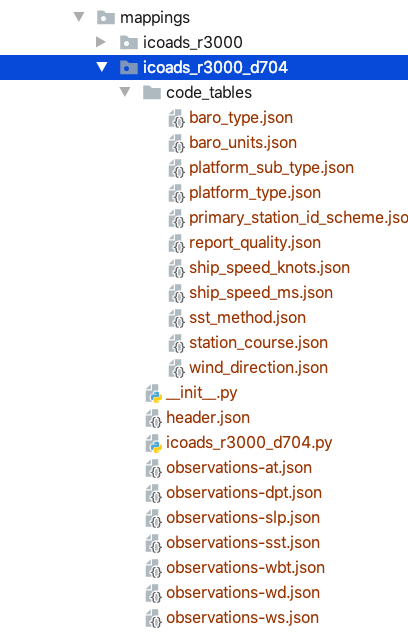

In [10]:
from IPython.display import Image
Image(filename='/Users/brivas/c3s_work/figures/cdm_704.png')

In the [icoads_r300_d704.py DONT FORGET TO ADD LINK]() file we will write all the functions needed to convert variables to the right units and/or specifications according with the [CDM documentation](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/blob/master/docs/cdm_latest.pdf)

To run the data model we need three things:

- raw data (the data we just read above)
- attributes of the raw data (sections and column names)
- the name of the model

> Note that the model and all necessary files should be already stored in the cdm-mapper/lib/mappings directory before you run anything!

In [11]:
attributes = data_raw.atts.copy()
name_of_model = 'icoads_r3000_d704'

cdm_dict = cdm.map_model(name_of_model, data_raw.data, attributes, cdm_subset = None, log_level = 'INFO')

/Users/brivas/.pyenv/versions/3.7.3/envs/c3s_env/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


Now, have we succeeded in writing some of the data to the CDM format?

We were looking to write the following data 

### Header section

 - Platform type and sub type (for now on a descriptive form due to [Issue#2](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/issues/2))
 - primary station id: original ship names
 - Longitude and Latitudes: converted from Degrees Minutes and Hemisphere to Decimal degrees
 - Location accuracy
 
 
### Observations tables

- `Observations-at`: latitude, longitude and location precision
- `Observations-dpt`: latitude, longitude and location precision
- `Observations-slp`: latitude, longitude and location precision
     - z_coordinate_type: Barometer height in feet converted to m.
     - sensor_id: Codes for the type of Barometer, according to the CDM documentation.
     - original units: left in a descriptive form **since the CDM documentation does not have units such as millibars or Paris inches.** More in [Issue#3](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/issues/3)

- `Observations-sst`: latitude, longitude and location precision
     - **We also have information about the sst method but we did find how to code this in the CDM**. More in [Issue#4](https://git.noc.ac.uk/brecinosrivas/cdm-mapper/-/issues/4)


- `Observations-wbt`: latitude, longitude and location precision
- `Observations-wd`: latitude, longitude and location precision
- `Observations-ws`: latitude, longitude and location precision


In [12]:
data = cdm_dict['header']['data']
data

,report_id,application_area,observing_programme,report_type,station_type,platform_type,platform_sub_type,primary_station_id,station_record_number,primary_station_id_scheme,longitude,latitude,location_accuracy,location_quality,crs,station_speed,station_course,height_of_station_above_local_ground,height_of_station_above_sea_level,report_meaning_of_timestamp,report_timestamp,report_duration,report_time_accuracy,report_time_quality,report_quality,duplicate_status,record_timestamp,history,source_id,source_record_id
0,ICOADS-30-020N16,"[1, 7, 10, 11]","[5, 7, 56]",0,2,sailing ship,ship,Panay,1,8.0,-66.50,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 06:00:00,11,3600.0,2,0,4,2021-01-22 14:49:03.959881,2021-01-22 14:49:03. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N16
1,ICOADS-30-020N1P,"[1, 7, 10, 11]","[5, 7, 56]",0,2,sailing ship,ship,Panay,1,8.0,-66.50,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 08:00:00,11,3600.0,2,0,4,2021-01-22 14:49:03.959881,2021-01-22 14:49:03. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N1P
2,ICOADS-30-020N25,"[1, 7, 10, 11]","[5, 7, 56]",0,2,sailing ship,ship,Panay,1,8.0,-66.50,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 10:00:00,11,3600.0,2,0,4,2021-01-22 14:49:03.959881,2021-01-22 14:49:03. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N25
3,ICOADS-30-020N2Q,"[1, 7, 10, 11]","[5, 7, 56]",0,2,sailing ship,ship,Panay,1,8.0,-66.50,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 12:00:00,11,3600.0,2,0,4,2021-01-22 14:49:03.959881,2021-01-22 14:49:03. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N2Q
4,ICOADS-30-020N3A,"[1, 7, 10, 11]","[5, 7, 56]",0,2,sailing ship,ship,Panay,1,8.0,-66.50,42.33,NaN,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 14:00:00,11,3600.0,2,0,4,2021-01-22 14:49:03.959881,2021-01-22 14:49:03. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N3A
5,ICOADS-30-020N41,"[1, 7, 10, 11]","[5, 7, 56]",0,2,sailing ship,ship,Panay,1,8.0,-66.50,42.33,2.0,3,0,4.11552,90.0,0.0,0.0,2,1878-10-20 16:00:00,11,3600.0,2,0,4,2021-01-22 14:49:03.959881,2021-01-22 14:49:03. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N41
6,ICOADS-30-020N4A,"[1, 7, 10, 11]","[5, 7, 56]",0,2,sailing ship,bark or barque,Emma,1,8.0,NaN,40.40,2.0,3,0,1.02888,135.0,0.0,0.0,2,1878-10-20 17:00:00,11,3600.0,2,0,4,2021-01-22 14:49:03.959881,2021-01-22 14:49:03. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N4A
7,ICOADS-30-020N4K,"[1, 7, 10, 11]","[5, 7, 56]",0,2,sailing ship,ship,Panay,1,8.0,-66.50,42.33,NaN,3,0,5.65884,90.0,0.0,0.0,2,1878-10-20 18:00:00,11,3600.0,2,0,4,2021-01-22 14:49:03.959881,2021-01-22 14:49:03. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N4K
8,ICOADS-30-020N4U,"[1, 7, 10, 11]","[5, 7, 56]",0,2,sailing ship,bark or barque,Emma,1,8.0,NaN,40.40,NaN,3,0,4.11552,135.0,0.0,0.0,2,1878-10-20 19:00:00,11,3600.0,2,0,4,2021-01-22 14:49:03.959881,2021-01-22 14:49:03. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N4U
9,ICOADS-30-020N4Y,"[1, 7, 10, 11]","[5, 7, 56]",0,2,sailing ship,bark or barque,Emma C.Litchfield,1,8.0,-81.05,31.33,NaN,3,0,NaN,135.0,0.0,0.0,2,1878-10-20 19:00:00,11,3600.0,2,0,4,2021-01-22 14:49:03.959881,2021-01-22 14:49:03. Initial conversion from I...,ICOADS-3-0-0T-125-704-1878-10,020N4Y


We now show an example of Lat and Longitude

In [13]:
data.latitude.head(), data.longitude.head()

(0    42.33
 1    42.33
 2    42.33
 3    42.33
 4    42.33
 Name: latitude, dtype: float64,
 0   -66.5
 1   -66.5
 2   -66.5
 3   -66.5
 4   -66.5
 Name: longitude, dtype: float64)

In [14]:
data_raw.data.c99_daily[['lat_deg_on','lat_min_on','lat_hemis_on', 'lon_deg_of', 'lon_min_of', 'lon_hemis_of']].head()

,lat_deg_on,lat_min_on,lat_hemis_on,lon_deg_of,lon_min_of,lon_hemis_of
0,42,20,N,66,30,W
1,42,20,N,66,30,W
2,42,20,N,66,30,W
3,42,20,N,66,30,W
4,42,20,N,66,30,W


This has been succesfully converted to Decimal degrees with the right (-) for each hemisphere. 


Now for the SLP we have other information:

In [15]:
data_raw.data.c99_journal[['baro_type', 'baro_height', 'baro_units']].head()

,baro_type,baro_height,baro_units
0,2,14,1
1,2,14,1
2,2,14,1
3,2,14,1
4,2,14,1


Baro type original code table

```
{
	"1":"aneroid",
	"2":"mercurial"
}
```

These types of barometer have been mapped to a "sensor_id" field according to the CDM Table#143 in page#138
```
{
  "1":"BARM3",
  "2":"BARM5"
}
```


Baro units original code table. It has been left like this:

```
{
	"1":"inches",
	"2":"millimeters",
	"3":"millibars",
	"4":"unable to determine",
	"5":"Paris inches"
}
```

**Since Millibars and Paris Inches are not available on the units code of the CDM** 

In [16]:
data_obs = cdm_dict['observations-slp']['data']
data_obs

,observation_id,report_id,data_policy_licence,date_time,date_time_meaning,observation_duration,longitude,latitude,crs,z_coordinate_type,observed_variable,observation_value,value_significance,units,conversion_flag,location_precision,spatial_representativeness,quality_flag,numerical_precision,sensor_id,sensor_automation_status,exposure_of_sensor,original_precision,original_units,original_value,conversion_method,processing_level,traceability,advanced_qc,advanced_uncertainty,advanced_homogenisation,source_id
0,ICOADS-30-020N16-SLP,ICOADS-30-020N16,0,1878-10-20 06:00:00,2,8,-66.50,42.33,0,4.267252,58,99610.000000,2,32,0,NaN,3,2,NaN,BARM5,5,3,NaN,inches,996.1,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
1,ICOADS-30-020N1P-SLP,ICOADS-30-020N1P,0,1878-10-20 08:00:00,2,8,-66.50,42.33,0,4.267252,58,99630.000000,2,32,0,NaN,3,2,NaN,BARM5,5,3,NaN,inches,996.3,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
2,ICOADS-30-020N25-SLP,ICOADS-30-020N25,0,1878-10-20 10:00:00,2,8,-66.50,42.33,0,4.267252,58,99690.000000,2,32,0,NaN,3,2,NaN,BARM5,5,3,NaN,inches,996.9,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
3,ICOADS-30-020N2Q-SLP,ICOADS-30-020N2Q,0,1878-10-20 12:00:00,2,8,-66.50,42.33,0,4.267252,58,99760.000000,2,32,0,NaN,3,2,NaN,BARM5,5,3,NaN,inches,997.6,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
4,ICOADS-30-020N3A-SLP,ICOADS-30-020N3A,0,1878-10-20 14:00:00,2,8,-66.50,42.33,0,4.267252,58,99920.000000,2,32,0,NaN,3,2,NaN,BARM5,5,3,NaN,inches,999.2,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
5,ICOADS-30-020N41-SLP,ICOADS-30-020N41,0,1878-10-20 16:00:00,2,8,-66.50,42.33,0,4.267252,58,100020.000000,2,32,0,2.0,3,2,NaN,BARM5,5,3,NaN,inches,1000.2,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
6,ICOADS-30-020N4A-SLP,ICOADS-30-020N4A,0,1878-10-20 17:00:00,2,8,NaN,40.40,0,3.048037,58,101150.000000,2,32,0,2.0,3,2,NaN,BARM3,5,3,NaN,inches,1011.5,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
7,ICOADS-30-020N4K-SLP,ICOADS-30-020N4K,0,1878-10-20 18:00:00,2,8,-66.50,42.33,0,4.267252,58,100110.000000,2,32,0,NaN,3,2,NaN,BARM5,5,3,NaN,inches,1001.1,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
8,ICOADS-30-020N4U-SLP,ICOADS-30-020N4U,0,1878-10-20 19:00:00,2,8,NaN,40.40,0,3.048037,58,101150.000000,2,32,0,NaN,3,2,NaN,BARM3,5,3,NaN,inches,1011.5,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
9,ICOADS-30-020N55-SLP,ICOADS-30-020N55,0,1878-10-20 20:00:00,2,8,-66.50,42.33,0,4.267252,58,100180.000000,2,32,0,NaN,3,2,NaN,BARM5,5,3,NaN,inches,1001.8,7,3,2,0,0,0,ICOADS-3-0-0T-125-704-1878-10
